Path found:
(0, 0)
(1, 0)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(2, 4)
(3, 4)
(4, 4)
[(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]


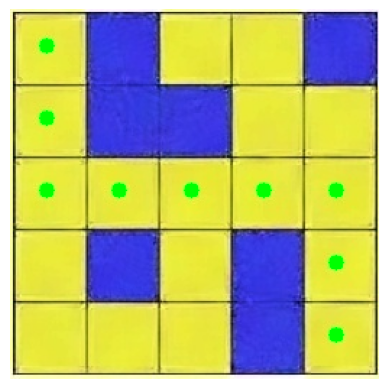

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img=cv2.imread('/content/denoised_image.jpg')
def find_path(grid):
    def is_valid_move(x, y):
        return 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1] and grid[x, y] != 0

    def backtrack(x, y, path):
        if x == grid.shape[0] - 1 and y == grid.shape[1] - 1:
            return True
        for dx, dy in [(0, 1), (1, 0)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(new_x, new_y):
                path.append((new_x, new_y))
                if backtrack(new_x, new_y, path):
                    return True
                path.pop()
        return False

    path = [(0, 0)]
    if backtrack(0, 0, path):
        return path
    return None

# Example grid
grid = np.array([[1, 0, 1, 1, 0],
                 [1, 0, 0, 1, 1],
                 [1, 1, 1, 1, 1],
                 [1, 0, 1, 0, 1],
                 [1, 1, 1, 0, 1]])

path = find_path(grid)
if path:
    print("Path found:")
    for step in path:
        print(step)
else:
    print("No path found.")

print(path)
height, width, _ = img.shape
z=(height/5 +width/5)/2
z=z//2
transformed_coordinates = [(2*z*x + z, 2*z*y + z) for x, y in path]

if img is None:
    print("Error: Image not loaded.")
else:

    # Draw circles at transformed coordinates
    for x, y in transformed_coordinates:
       cv2.circle(img, (int(y), int(x)), 5, (0, 255, 0), -1)  # Green circles for path points

# Convert the image from BGR to RGB (Matplotlib expects RGB images)
denoised_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('denoised_image.jpg', img)

# Display the denoised image using Matplotlib
plt.imshow(denoised_image_rgb)
plt.axis('off')  # Turn off axis numbers
plt.show()